# Library Collection Data

In [93]:
import pandas as pd

collection = pd.read_csv('data/dartmouth-library-collection-lcc.csv', na_values='Unknown', na_filter=True)
collection.rename(columns={'Classification Code': 'code', 'Num of Titles (Active)': 'n_titles'}, inplace=True)

In [94]:
collection['main_class'] = collection.code.apply(lambda x: x[0] if isinstance(x, str) else None)
collection['subclass'] = collection.code.apply(lambda x: x[1] if isinstance(x, str) and len(x) > 1 else '_')
collection['subsubclass'] = collection.code.apply(lambda x: x[2] if isinstance(x, str) and len(x) > 2 else '_')
collection.dropna(subset=['main_class', 'subclass'], inplace=True)
collection

,code,n_titles,main_class,subclass,subsubclass
0,AC,4472,A,C,_
1,AE,275,A,E,_
2,AG,228,A,G,_
3,AI,69,A,I,_
4,AM,876,A,M,_
...,...,...,...,...,...
420,VG,127,V,G,_
421,VK,635,V,K,_
422,VM,655,V,M,_
423,Z,29289,Z,_,_


In [95]:
import plotly.express as px
fig = px.treemap(collection, 
                 path=['main_class', 'subclass', 'subsubclass'], 
                 values='n_titles',
                )
fig.show()

<AxesSubplot: xlabel='main_class'>

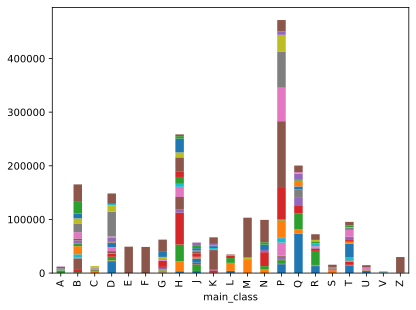

In [96]:
collection.groupby(by=['main_class', 'subclass']).n_titles.sum().unstack().plot.bar(stacked=True, legend=False)

In [97]:
collection

,code,n_titles,main_class,subclass,subsubclass
0,AC,4472,A,C,_
1,AE,275,A,E,_
2,AG,228,A,G,_
3,AI,69,A,I,_
4,AM,876,A,M,_
...,...,...,...,...,...
420,VG,127,V,G,_
421,VK,635,V,K,_
422,VM,655,V,M,_
423,Z,29289,Z,_,_


In [90]:
import colorsys

import matplotlib.colors

base_color = {
    '_': "#000000",
    'A': "#E5F5F9",
    'B': "#1D91C0",
    'C': "#67001F",
    'D': "#F7FCFD",
    'E': "#CB181D",
    'F': "#78C679",
    'G': "#F46D43",
    'H': "#A6CEE3",
    'I': "#FD8D3C",
    'J': "#A6D854",
    'K': "#D4B9DA",
    'L': "#6A51A3",
    'M': "#7F0000",
    'N': "#D9D9D9",
    'O': "#FFF7BC",
    'P': "#000000",
    'Q': "#F0F0F0",
    'R': "#C7EAE5",
    'S': "#003C30",
    'T': "#F16913",
    'U': "#FFF7FB",
    'V': "#8C6BB1",
    'W': "#C7E9B4",
    'X': "#762A83",
    'Y': "#FC9272",
    'Z': "#AE017E"
}

def get_shade(idx):
    base, shade = idx.split('-')
    h, s, v = colorsys.rgb_to_hsv(*matplotlib.colors.to_rgb(base_color[base]))
    v += (ord(shade)-65) * .03
    v = max(0, v)
    v = min(1, v)
    return colorsys.hsv_to_rgb(h, s, v)


colors = [get_shade(col) for _, col in collection.columns] 

<AxesSubplot: xlabel='main_class'>

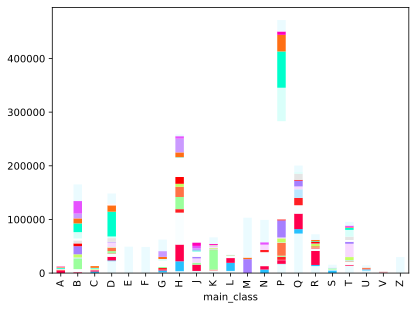

In [91]:
collection.plot.bar(stacked=True, color=colors, legend=False)